In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[:] + (1,)).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[:] + (1,)).astype('float32') / 255
print(X_train.shape, y_test.shape)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
chkp = tf.keras.callbacks.ModelCheckpoint('models/model{epoch:02d}.h5', monitor='val_loss', mode='auto', period=1)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[chkp])

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
Image.fromarray(X_test[0])

In [2]:
img = Image.open('../raw_picture.png')

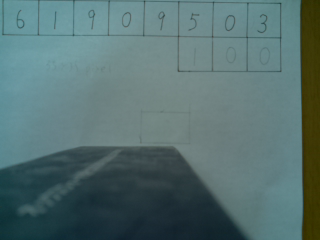

In [3]:
img

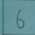

In [4]:
Image.fromarray(np.array(img)[:35, :35])

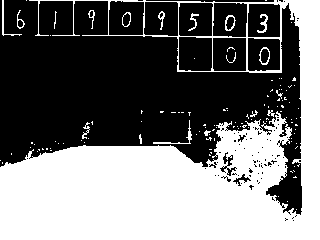

In [9]:
bimg = np.array(img.convert('L'))
bimg = (bimg > 120) * 255
bimg = 255 - bimg.astype('uint8')
Image.fromarray(bimg)